In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

In [14]:
class CustomLinearRegression:
    
    def __init__(self, lr=.01):
        self.__lr = lr
        
    def fit(self, X, y):
        
        self.__mean = X.mean(axis=0)
        self.__std = X.std(axis=0)

        X = (X - self.__mean) / self.__std
        
        X_mod = np.hstack([np.ones((X.shape[0] ,1)), X])
        
        self.__X = X_mod
        self.__y = y
        
        self.theta_ = np.random.randn(X_mod.shape[1], 1)
        
        errors = []
        
        for k in range(20):
            self.gradient_decend()
            errors.append(self.error())
            
        return errors
            
    def gradient_decend(self):
        delta_theta = self.gradient()
        
        self.theta_ += delta_theta
        
        
    def gradient(self):
        yh = self.hypo(self.__X)
        
        diff = (yh - self.__y.reshape(-1, 1))
        del_err_theta = (np.dot(diff.T, self.__X)).T / len(yh)

        return -del_err_theta*self.__lr
        
    def hypo(self, X):
        return np.dot(X, self.theta_)
    
    def predict(self, X):
        X_mod = (X - self.__mean) / self.__std
        X_mod = np.hstack([np.ones((X_mod.shape[0] ,1)), X_mod])
        y_h = self.hypo(X_mod)
        return y_h.flatten()
    
    def error(self):
        yh = self.hypo(self.__X)
        diff = (yh - self.__y.reshape(-1, 1))
        return (diff ** 2).mean()
        
    

In [15]:
from sklearn.datasets import load_boston

In [16]:
d = load_boston()

In [17]:
X, y = d.data, d.target

In [18]:
model = CustomLinearRegression(lr=.3)

In [19]:
errs = model.fit(X, y)

In [21]:
errs

[325.7061725154655,
 178.51629559239694,
 104.97912073310727,
 67.65504769991783,
 48.33420204562666,
 38.07834155062872,
 32.45844709208092,
 29.256204091710032,
 27.346048139714508,
 26.14755264753139,
 25.355263725479926,
 24.804349667512504,
 24.403151819217786,
 24.09891907161122,
 23.86013742267799,
 23.66724404440132,
 23.507632991047544,
 23.37289416325162,
 23.25723856927094,
 23.156569618691915]

In [20]:
import matplotlib.pyplot as plt

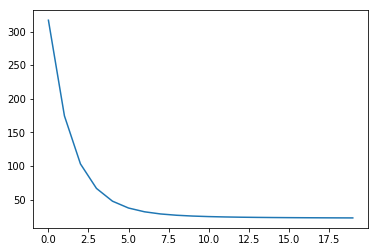

In [96]:
plt.plot(errs)

In [50]:
model.coef_

array([-0.88969251,  1.02658914, -0.0188235 ,  0.70533307, -2.02485267,
        2.70203953, -0.00446024, -3.10946841,  2.24796355, -1.61170208,
       -2.04586554,  0.85392381, -3.73252493])

In [51]:
model.intercept_

22.532806324110673

In [22]:
model.predict(X[:10])

array([30.68842619, 24.82593447, 30.8595385 , 29.16396487, 28.73995129,
       25.33654763, 23.01011086, 20.09675842, 12.38016479, 19.55043926])

In [53]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
model = LinearRegression()

In [59]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
model.predict(X[:10])

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232,
       25.25940048, 23.00433994, 19.5347558 , 11.51696539, 18.91981483])

In [8]:
print(d.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [97]:
LinearRegression?

Init signature: LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
Docstring:     
Ordinary least squares Linear Regression.

Parameters
----------
fit_intercept : boolean, optional, default True
    whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (e.g. data is expected to be already centered).

normalize : boolean, optional, default False
    This parameter is ignored when ``fit_intercept`` is set to False.
    If True, the regressors X will be normalized before regression by
    subtracting the mean and dividing by the l2-norm.
    If you wish to standardize, please use
    :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
    an estimator with ``normalize=False``.

copy_X : boolean, optional, default True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int, optional, default 1
    The number of jobs to use for the computation.
    If -1 all CPUs